# Linear Regression

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Data Load

In [3]:
data_sal = pd.read_csv('salary_data.csv')
data_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### 3. Data Visualization

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

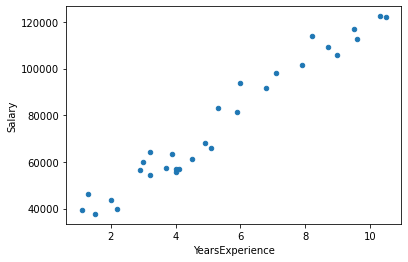

In [6]:
data_sal.plot.scatter(x = 'YearsExperience', y = 'Salary')

### 4. Train and Test Data

In [35]:
import sklearn 
from sklearn.model_selection import train_test_split 

In [8]:
train_data_sal, test_data_sal = train_test_split(data_sal, test_size = 0.2)

In [11]:
print('Total Row Data Training', train_data_sal.shape[0])

Total Row Data Training 24


In [12]:
print('Total Row Data Testing', test_data_sal.shape[0])

Total Row Data Testing 6


### 5. Dependent and Independent Data

In [13]:
train_label_sal = train_data_sal['Salary']
train_features_sal = train_data_sal.drop(['Salary'], axis = 1)

In [14]:
test_label_sal = test_data_sal['Salary']
test_features_sal = test_data_sal.drop(['Salary'], axis = 1)

### 6. Run The Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model = LinearRegression()

In [18]:
lr_model.fit(X = train_features_sal, y = train_label_sal)

LinearRegression()

In [19]:
salary_pred = lr_model.predict(test_features_sal)

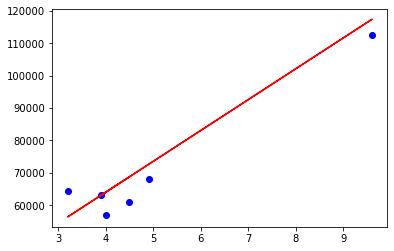

In [21]:
plt.scatter(test_data_sal['YearsExperience'], test_data_sal['Salary'], color = 'blue')
plt.plot(test_data_sal['YearsExperience'], salary_pred, color = 'red')

In [23]:
print('Coefficient', lr_model.coef_[0])
print('Intercept', lr_model.intercept_)

Coefficient 9537.110076992612
Intercept 25859.902793535628


#### Model : 9537.110076992612*x + 25859.902793535628

# Logistic Regression

### 1. Data Loading

In [55]:
data_bank = pd.read_csv('banking.csv')
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [56]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

### 2. Data Preprocessing

In [57]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [58]:
# One-Hot Encoding for Categorical Data
for var in cat_vars:
    cat_list = pd.get_dummies(data_bank[var],prefix = var)
    data1 = data_bank.join(cat_list)
    data_bank = data1

In [59]:
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1


In [60]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   job                            41188 non-null  object 
 2   marital                        41188 non-null  object 
 3   education                      41188 non-null  object 
 4   default                        41188 non-null  object 
 5   housing                        41188 non-null  object 
 6   loan                           41188 non-null  object 
 7   contact                        41188 non-null  object 
 8   month                          41188 non-null  object 
 9   day_of_week                    41188 non-null  object 
 10  duration                       41188 non-null  int64  
 11  campaign                       41188 non-null  int64  
 12  pdays                          41188 non-null 

In [61]:
data_vars = data_bank.columns.values.tolist()

In [62]:
# Renome categorical data
to_keep = [i for i in data_vars
          if i not in cat_vars]

In [63]:
# Define new DataFrame without Categorical Data
data_bank2 = data_bank[to_keep]

In [64]:
data_bank2.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [75]:
data_bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

### 3. Train and Test Data

In [65]:
data_vars = data_bank2.columns.values.tolist()
y = ['y']
X = [i for i in data_vars if i not in y]

In [66]:
data_bank[X].head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [67]:
data_bank[y]

,y
0,0
1,0
2,1
3,0
4,1
...,...
41183,0
41184,0
41185,0
41186,0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(data_bank2[X], data_bank2[y], test_size = 0.3)

In [70]:
print('Total Row Data Training', X_train.shape[0])

Total Row Data Training 28831


In [71]:
print('Total Row Data Test', X_test.shape[0])

Total Row Data Test 12357


### 4. Run The Model

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logreg = LogisticRegression()

In [77]:
logreg.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
model_score = logreg.score(X_test, y_test)

In [79]:
print('Model Accuracy', model_score)

Model Accuracy 0.9091203366512908


### 5. Visualization

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

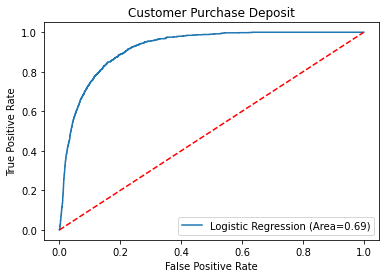

In [81]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) 
fpr, tpr, threshols = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Logistic Regression (Area=%0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
#plt.xlim([0.0,1.0])
#plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Customer Purchase Deposit')
plt.legend(loc="lower right")
plt.show()

#### Jika plot tidak dilimit di [0,1] dan [0,1]

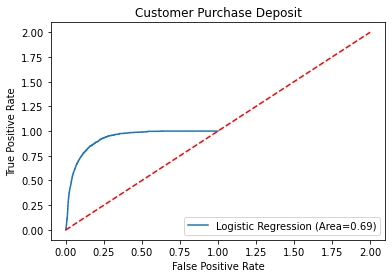

In [82]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) 
fpr, tpr, threshols = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Logistic Regression (Area=%0.2f)'%logit_roc_auc)
plt.plot([0,2],[0,2],'r--')
#plt.xlim([0.0,2.0])
#plt.ylim([0.0,2.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Customer Purchase Deposit')
plt.legend(loc="lower right")
plt.show()